In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import sklearn
from sklearn import datasets
import os
from sklearn.datasets import make_blobs
from matplotlib.image import imread # or `from imageio import imread`
from sklearn.cluster import KMeans


In [2]:
blob_centers = np.array(
    [[ -0.5,  -0.5],
     [-1.5 ,  2.5],
     [-3.0,  0.5],
     [-3.3,  2.8],
     [-2.7,  -1.0]])
blob_std = np.array([0.3, 0.3, 0.15, 0.3, 0.2])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

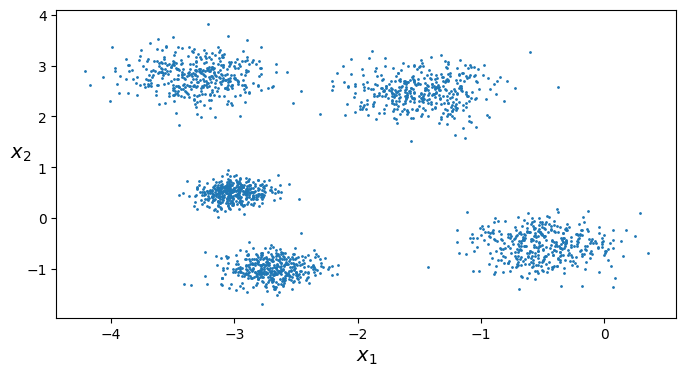

In [3]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)


plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

# Using the optimal k

In [4]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [5]:
y_pred

array([4, 1, 2, ..., 3, 2, 1], dtype=int32)

In [6]:
y_pred is kmeans.labels_

True

In [7]:
# The following 5 centroid were calculated:
kmeans.cluster_centers_

array([[-1.48294779,  2.48935087],
       [-3.01058702,  0.50070595],
       [-0.49990581, -0.53403394],
       [-3.30280425,  2.79450491],
       [-2.70044418, -0.99728389]])

In [8]:
kmeans.labels_

array([4, 1, 2, ..., 3, 2, 1], dtype=int32)

In [9]:
# Predict the labels for new instances
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 2, 3, 3], dtype=int32)

In [10]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel1")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

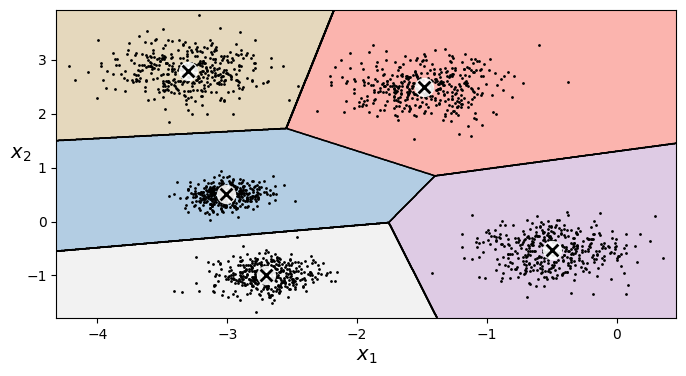

In [11]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

# Finding the right number of cluster - k

In [12]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

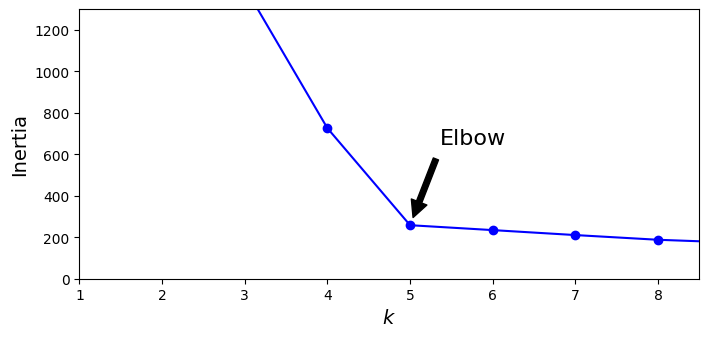

In [13]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(5, inertias[4]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

# Show the importance of random state and getting the right k

In [14]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

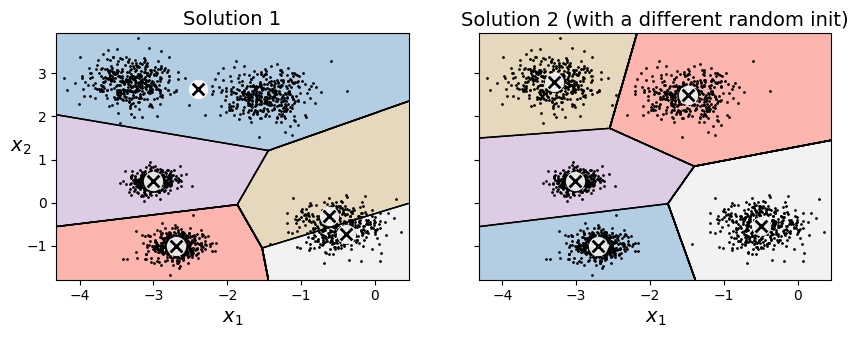

In [15]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=5)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

plt.show()

In [16]:
# And now with different k

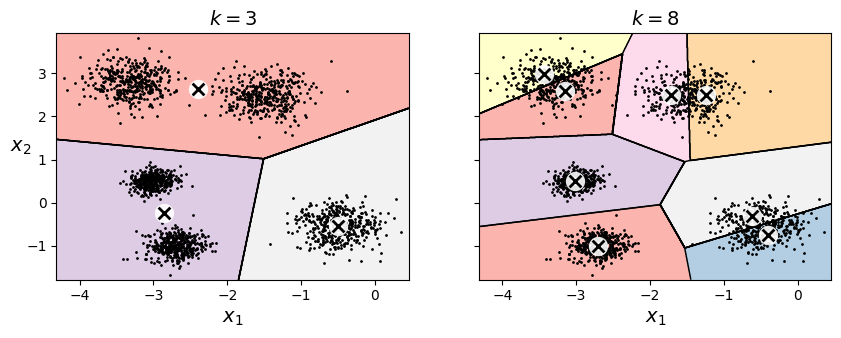

In [17]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
plt.show()

# Image segmentation with k-means

In [22]:

# Get data
dir = os.getcwd()
data_dir = dir + "/app_data/purple_tulip.jpg" # For cloud
data_dir = "/Users/dj/Documents/GitHub/project-neurocloud/my_app/app_data/purple_tulip.jpg" # For PC
# image = imread(os.path.join("images","unsupervised_learning","ladybug.png")) 
image = imread((data_dir)) 
image.shape # h x w x RGB

(2832, 4256, 3)

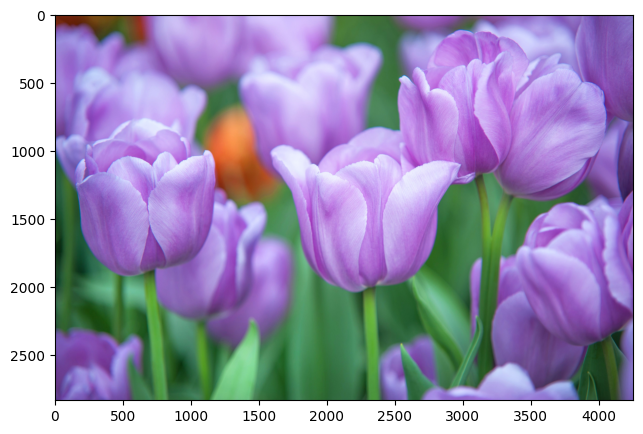

In [23]:
plt.figure(figsize=(10,5))
plt.imshow(image)

In [13]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [24]:
segmented_img.shape

(2832, 4256, 3)

In [28]:
np.round(segmented_img)

array([[[182., 101.,  57.],
        [182., 101.,  57.],
        [182., 101.,  57.],
        ...,
        [142.,  98., 189.],
        [142.,  98., 189.],
        [142.,  98., 189.]],

       [[182., 101.,  57.],
        [182., 101.,  57.],
        [182., 101.,  57.],
        ...,
        [142.,  98., 189.],
        [142.,  98., 189.],
        [142.,  98., 189.]],

       [[182., 101.,  57.],
        [182., 101.,  57.],
        [182., 101.,  57.],
        ...,
        [142.,  98., 189.],
        [142.,  98., 189.],
        [142.,  98., 189.]],

       ...,

       [[110.,  77., 141.],
        [110.,  77., 141.],
        [110.,  77., 141.],
        ...,
        [142.,  98., 189.],
        [142.,  98., 189.],
        [142.,  98., 189.]],

       [[110.,  77., 141.],
        [110.,  77., 141.],
        [110.,  77., 141.],
        ...,
        [142.,  98., 189.],
        [142.,  98., 189.],
        [142.,  98., 189.]],

       [[110.,  77., 141.],
        [110.,  77., 141.],
        [110.,  

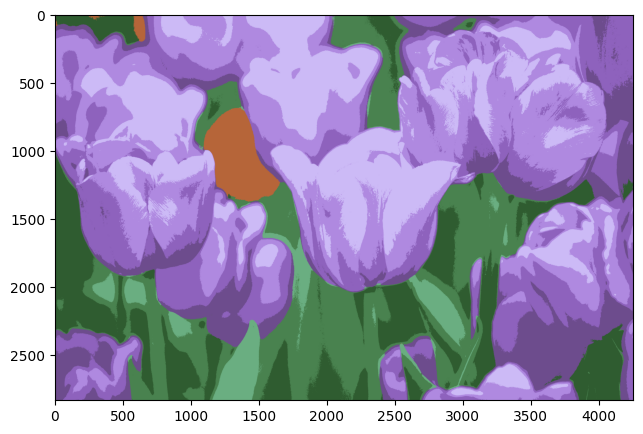

In [30]:
plt.figure(figsize=(10,5))
plt.imshow(segmented_img.reshape(image.shape).astype(np.uint8))

In [31]:
# Nor for different k

segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape).astype(np.uint8))

In [ ]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

# save_fig('image_segmentation_diagram', tight_layout=False)
plt.show()